In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0)

In [2]:
df = pd.read_csv("cleanedLBW.csv")

In [3]:
df.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [4]:
X = df.iloc[:,:-1]
y = df.Result
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.50, random_state=42)

In [5]:
df.columns

Index(['Community', 'Age', 'Weight', 'Delivery phase', 'HB', 'IFA', 'BP',
       'Education', 'Residence', 'Result'],
      dtype='object')

In [6]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(48, 9)
(48,)
(48, 9)
(48,)


In [7]:
trainX = np.array(train_x.T)
testX = np.array(test_x.T)
trainY = np.array(train_y.values.reshape((1, train_y.shape[0])))
testY = np.array(test_y.values.reshape((1, test_y.shape[0])))

In [8]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(9, 48)
(1, 48)
(9, 48)
(1, 48)


In [9]:
n_x = trainX.shape[0]
n_h = 17
n_y = 1
layers_dims = (n_x, n_h, n_y)

In [10]:
def sigmoid(Z):
    """
    Implements the sigmoid activation function.
    """
    A = 1 / (1 + np.exp(-Z))
    
    return A

In [11]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    parameters -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    np.random.seed(1)
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros(shape=(n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros(shape=(n_y, 1))
    
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [12]:
def forward_propagation(X, parameters):
    """
    Implement the neural network's forward propagation.
    """
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    parameters["Z1"] = Z1
    parameters["A1"] = A1
    parameters["Z2"] = Z2
    parameters["A2"] = A2
    
    return parameters

In [13]:
def cost(Y, parameters):
    """
    Implement the cross-entropy cost function.
    """
    m = Y.shape[1]                           # number of examples
    AL = parameters["A2"]
    
    cost = (-1 / m) * np.sum(np.multiply(Y, np.log(AL)) + np.multiply(1 - Y, np.log(1 - AL)))
    
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    return cost

In [14]:
def back_propagation(X, Y, parameters):
    """
    Implement the backward propagation for the neural network
    """
    A1 = parameters["A1"]
    A2 = parameters["A2"]
    Z1 = parameters["Z1"]
    W2 = parameters["W2"]
    m = X.shape[1]                           # number of examples
    
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = (np.sum(dZ2, axis=1, keepdims=True)) / m
    dZ1 = np.dot(W2.T, dZ2) * (A1 * (1-A1))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = (np.sum(dZ1, axis=1, keepdims=True)) / m
    
    parameters["dZ2"] = dZ2
    parameters["dW2"] = dW2
    parameters["db2"] = db2
    parameters["dZ1"] = dZ1
    parameters["dW1"] = dW1
    parameters["db1"] = db1
    
    return parameters

In [15]:
def update_parameters(parameters, learning_rate):
    """
    Update parameters using gradient descent.
    """
    for l in range(2):
        parameters["W" + str(l + 1)] = parameters["W" + str(l + 1)] - learning_rate * parameters["dW" + str(l + 1)]
        parameters["b" + str(l + 1)] = parameters["b" + str(l + 1)] - learning_rate * parameters["db" + str(l + 1)]
        
    return parameters

In [16]:
def two_layer_model(X, Y, layers_dims, learning_rate=0.001, num_iterations=100000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->SIGMOID->LINEAR->SIGMOID.
    """
    np.random.seed(1)
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    for i in range(0, num_iterations):
        parameters = forward_propagation(X, parameters)
        costt = cost(Y, parameters)
        parameters = back_propagation(X, Y, parameters)
        parameters = update_parameters(parameters, learning_rate)
        if print_cost and i % 20000 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(costt)))
        if print_cost and i % 20000 == 0:
            costs.append(costt)
        
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per 20 thousand)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.6929000220514328
Cost after iteration 20000: 0.450781975198158
Cost after iteration 40000: 0.3585846178957397
Cost after iteration 60000: 0.3056002334920368
Cost after iteration 80000: 0.27621164240737195
Cost after iteration 100000: 0.25922647845552027
Cost after iteration 120000: 0.2472891440255012
Cost after iteration 140000: 0.23771190299882622
Cost after iteration 160000: 0.22946783525904146
Cost after iteration 180000: 0.2221405682859725


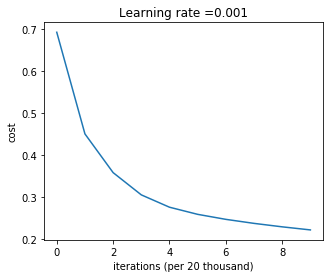

In [17]:
parameters = two_layer_model(trainX, trainY, layers_dims = layers_dims, num_iterations = 200000, print_cost=True)

In [18]:
def predict(X, y, parameters):
    """
    Predicts the results of a  2-layer neural network.
    """
    m = X.shape[1]
    p = np.zeros((1,m))
    
    parameters = forward_propagation(X, parameters)
    probas = parameters["A2"]
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    print("Accuracy: "  + str(np.sum((p == y)/m)))    
    
    return p

In [19]:
pred_train = predict(trainX, trainY, parameters)

Accuracy: 0.8958333333333333


In [20]:
pred_test = predict(testX, testY, parameters)

Accuracy: 0.8749999999999999


In [21]:
def CM(y_test,y_test_obs):
    '''
    Prints the confusion matrix.
    '''
    for i in range(len(y_test_obs)):
        if(y_test_obs[i]>0.6):
            y_test_obs[i]=1
        else:
            y_test_obs[i]=0

    cm=[[0,0],[0,0]]
    fp=0
    fn=0
    tp=0
    tn=0

    for i in range(len(y_test)):
        if(y_test[i]==1 and y_test_obs[i]==1):
            tp=tp+1
        if(y_test[i]==0 and y_test_obs[i]==0):
            tn=tn+1
        if(y_test[i]==1 and y_test_obs[i]==0):
            fp=fp+1
        if(y_test[i]==0 and y_test_obs[i]==1):
            fn=fn+1
    
    cm[0][0]=tn
    cm[0][1]=fp
    cm[1][0]=fn
    cm[1][1]=tp
    p= tp/(tp+fp)
    r=tp/(tp+fn)
    f1=(2*p*r)/(p+r)
    
    print("Confusion Matrix : ")
    print(cm)
    print("\n")
    print(f"Precision : {p}")
    print(f"Recall : {r}")
    print(f"F1 SCORE : {f1}")

In [22]:
CM(testY[0], pred_test[0])

Confusion Matrix : 
[[8, 3], [3, 34]]


Precision : 0.918918918918919
Recall : 0.918918918918919
F1 SCORE : 0.918918918918919
